In [ ]:
from google.colab import drive
import os
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path
ratings_dir = Path("/content/drive/MyDrive/deep_learning_training/experiments/letterboxd/crawled/ratings")

df_all = pd.concat(
    (pd.read_csv(f) for f in ratings_dir.glob('*.csv')),
    ignore_index=True
)

print(len(df_all)) # already verified that data has no duplicates

19621514


In [ ]:
movie_popularity = df_all["movie_id"].value_counts()
print("Unique movies: ", movie_popularity.count())
print("Most watched movies:")
print(movie_popularity.head())

Unique movies:  399550
Most watched movies:
movie_id
barbie                               9486
parasite-2019                        8917
get-out-2017                         8695
everything-everywhere-all-at-once    8521
la-la-land                           8514
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
popularity_brackets = movie_popularity.value_counts()
print("Top popularity brackets: ")
print(popularity_brackets.head())

Top popularity brackets: 
count
1    128286
2     58026
3     33237
4     22406
5     16158
Name: count, dtype: int64


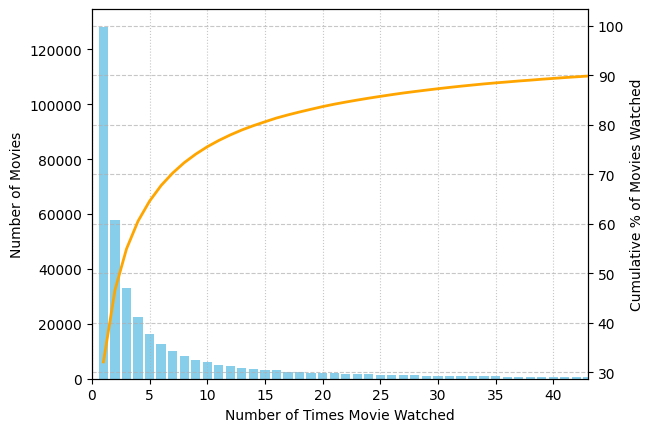

In [ ]:
import numpy as np
occurrences = sorted(popularity_brackets.keys())
counts = [popularity_brackets[entry] for entry in occurrences]
cum_percent = np.cumsum(counts) / np.sum(counts) * 100

_, ax1 = plt.subplots()
ax1.bar(occurrences, counts, color='skyblue')
ax1.set_xlabel('Number of Times Movie Watched')
ax1.set_ylabel('Number of Movies')

ax2 = ax1.twinx()
ax2.plot(occurrences, cum_percent, color='orange', linewidth=2)
ax2.set_ylabel('Cumulative % of Movies Watched')

ax1.grid(True, axis='x', linestyle=':', alpha=0.7)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

limit_width_to_percent = np.searchsorted(cum_percent, 90)
plt.xlim(0,limit_width_to_percent)

plt.show()

# Considerations:
# Memory can be reduced a lot by ignoring movies that have been watched only a few times
# 30% saving by just removing movies watched once, 75% savings by removing movies watched less than 10 times

In [ ]:
user_watchcount = df_all["user_id"].value_counts()
print("Unique users: ", user_watchcount.count())
print("Most active users:")
print(user_watchcount.head())

Unique users:  11723
Most active users:
user_id
acervofilmico    90704
punq             40265
geesuss          35151
loureviews       27054
voidness         24318
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
watchcount_brackets = user_watchcount.value_counts()
print("Top user watchcount brackets: ")
print(watchcount_brackets.head())

Top user watchcount brackets: 
count
1      22
698    14
720    14
684    14
561    13
Name: count, dtype: int64


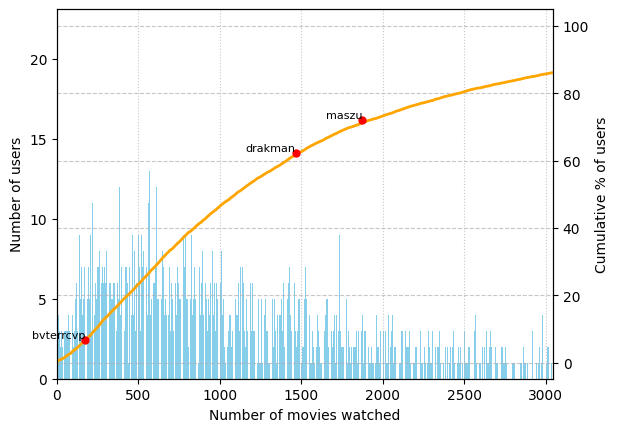

In [ ]:
import numpy as np
occurrences = sorted(watchcount_brackets.keys())
counts = [watchcount_brackets[entry] for entry in occurrences]
cum_percent = np.cumsum(counts) / np.sum(counts) * 100

_, ax1 = plt.subplots()
ax1.bar(occurrences, counts, color='skyblue')
ax1.set_xlabel('Number of movies watched')
ax1.set_ylabel('Number of users')

ax2 = ax1.twinx()
ax2.plot(occurrences, cum_percent, color='orange', linewidth=2)
ax2.set_ylabel('Cumulative % of users')

ax1.grid(True, axis='x', linestyle=':', alpha=0.7)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

for user in ["drakman", "maszu", "bvterrcvp"]:
  x = user_watchcount[user]
  y = cum_percent[x]
  ax2.plot(x, y, 'ro', markersize=5)
  ax2.text(x, y, user, fontsize=8, verticalalignment='bottom', horizontalalignment='right')

limit_width_to_percent = np.searchsorted(cum_percent, 90)
plt.xlim(0,limit_width_to_percent)

plt.show()

# Considerations
# The distribution is pretty linear, so there is no gain to be had to cutoff the least active users.
# I think the difference between this data and the movie data is how I crawled them.
# If I started crawling from popular movies, users would be the one with the pareto distribution

In [ ]:
def find_unpopular_movies_for_user(user_id):
  user_movies = df_all[df_all["user_id"] == user_id]
  user_movies_popularity = movie_popularity[user_movies["movie_id"]]
  unpopular_user_movies = user_movies_popularity[lambda count: count == 1]
  return unpopular_user_movies

print(find_unpopular_movies_for_user("drakman"))

movie_id
stay-awesome-china                   1
senza-filtro                         1
tel-chi-el-telun                     1
new-world-order-2015                 1
i-roteo-e-la-magia-dello-specchio    1
ale-e-franz-e-tanto-che-aspetti      1
occhio-a-quei-due                    1
Name: count, dtype: int64


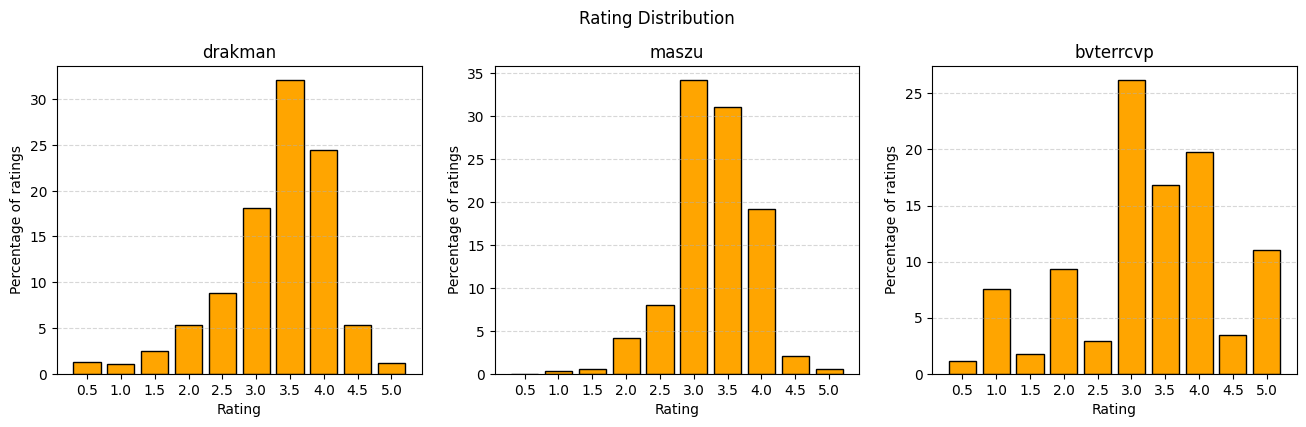

In [ ]:
def rating_distribution_for(user_id):
  user_movies = df_all if user_id == "every user" else df_all[df_all["user_id"] == user_id]
  return user_movies["rating"].value_counts() / len(user_movies) * 100


def plot_rating_distribution_for(ax, user_id):
  bins = [i * 0.5 for i in range(1, 11)]
  dist = rating_distribution_for(user_id)
  dist = dist.reindex(bins, fill_value=0)
  ax.bar(dist.index, dist.values, width=0.4, color='orange', edgecolor='black')
  ax.set_xlabel("Rating")
  ax.set_xticks(bins)
  ax.set_ylabel("Percentage of ratings")
  ax.set_title(f"{user_id}")
  ax.grid(axis='y', linestyle='--', alpha=0.5)

def plot_rating_distributions(users):
  fig, axs = plt.subplots(1, len(users), figsize=(16, 4))
  fig.suptitle("Rating Distribution", y=1.02)
  for user in users:
    plot_rating_distribution_for(axs[users.index(user)], user)
  plt.show()

plot_rating_distributions(["drakman", "maszu", "bvterrcvp"])